# 1. Research Question
## Which Community Districts in NYC show the highest number of complaints?

# 2. Data

In [92]:
import os
import pandas as pd
import pylab as pl
import numpy as np
import re
import seaborn
import statsmodels.api as sm
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

%pylab inline

PUIdata = os.getenv('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['inf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#get_ipython().system("curl -O 'http://urbanprofiler.cloudapp.net/dataset/erm2-nwe9'")
data = pd.read_csv('311_Service_Requests_from_2010_to_Present (2).csv')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,34212771,09/01/2016 12:00:06 AM,09/01/2016 06:02:10 AM,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,11413.0,137-47 CARSON STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.675208,-73.754949,"(40.67520813178531, -73.75494944502233)"
1,34212392,09/01/2016 12:00:35 AM,09/02/2016 04:53:48 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10469.0,943 EAST 217 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.879986,-73.856707,"(40.87998640855491, -73.85670741555177)"
2,34214520,09/01/2016 12:00:37 AM,09/01/2016 01:05:43 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11369.0,98-02 25 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.764632,-73.871623,"(40.76463242381882, -73.87162284918391)"
3,34212483,09/01/2016 12:00:54 AM,09/01/2016 03:15:32 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,1017 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.885559,-73.850782,"(40.885558858976104, -73.85078238918491)"
4,34214231,09/01/2016 12:01:15 AM,09/06/2016 09:27:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,10040.0,4700 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.864140,-73.929501,"(40.864140093130686, -73.92950060219349)"


In [4]:
data.columns

Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',

In [5]:
data.drop([u'Descriptor', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',
       u'Bridge Highway Segment', u'Garage Lot Name', u'Ferry Direction',
       u'Ferry Terminal Name', u'Latitude', u'Longitude'], axis = 1, inplace = True)

In [6]:
data.drop([u'Location Type'], axis = 1, inplace = True)

In [7]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Incident Zip,Incident Address,Status,Community Board,Borough,Location
0,34212771,09/01/2016 12:00:06 AM,09/01/2016 06:02:10 AM,NYPD,New York City Police Department,Noise - Residential,11413.0,137-47 CARSON STREET,Closed,13 QUEENS,QUEENS,"(40.67520813178531, -73.75494944502233)"
1,34212392,09/01/2016 12:00:35 AM,09/02/2016 04:53:48 PM,NYPD,New York City Police Department,Blocked Driveway,10469.0,943 EAST 217 STREET,Closed,12 BRONX,BRONX,"(40.87998640855491, -73.85670741555177)"
2,34214520,09/01/2016 12:00:37 AM,09/01/2016 01:05:43 AM,NYPD,New York City Police Department,Blocked Driveway,11369.0,98-02 25 AVENUE,Closed,03 QUEENS,QUEENS,"(40.76463242381882, -73.87162284918391)"
3,34212483,09/01/2016 12:00:54 AM,09/01/2016 03:15:32 AM,NYPD,New York City Police Department,Blocked Driveway,10466.0,1017 EAST 226 STREET,Closed,12 BRONX,BRONX,"(40.885558858976104, -73.85078238918491)"
4,34214231,09/01/2016 12:01:15 AM,09/06/2016 09:27:00 AM,DOT,Department of Transportation,Street Condition,10040.0,4700 BROADWAY,Closed,12 MANHATTAN,MANHATTAN,"(40.864140093130686, -73.92950060219349)"


# 3. Measurement Errors

In [8]:
# this is wrong because there are actually 59
len(data['Community Board'].unique())

74

In [9]:
#obviously wrong because there are 5 boroughs
len(data['Borough'].unique())

6

In [10]:
print (data['Borough'].unique())

['QUEENS' 'BRONX' 'MANHATTAN' 'BROOKLYN' 'Unspecified' 'STATEN ISLAND']


## looking into duplicates

In [11]:
len(data)

34897

In [12]:
len(data['Unique Key'].unique())

34897

### the two above are the same, so we don't have duplicate Unique Keys

In [13]:
# Looking at duplicaton of locations. This doesn't mean a single problem is being reported multiple times,
# but it is interesting to see there are multiple complaints at some locations.
# Looking at create date and time would probably be a better way to look for duplicates.
len(data['Location'].unique())

21121

In [14]:
print (data['Community Board'])

0               13 QUEENS
1                12 BRONX
2               03 QUEENS
3                12 BRONX
4            12 MANHATTAN
5            09 MANHATTAN
6               08 QUEENS
7               01 QUEENS
8                07 BRONX
9             01 BROOKLYN
10            01 BROOKLYN
11           03 MANHATTAN
12           09 MANHATTAN
13              08 QUEENS
14           03 MANHATTAN
15              09 QUEENS
16               05 BRONX
17            03 BROOKLYN
18           07 MANHATTAN
19            12 BROOKLYN
20              08 QUEENS
21              09 QUEENS
22          0 Unspecified
23            09 BROOKLYN
24              03 QUEENS
25              08 QUEENS
26              07 QUEENS
27          0 Unspecified
28              01 QUEENS
29              01 QUEENS
               ...       
34867            11 BRONX
34868       0 Unspecified
34869           07 QUEENS
34870    01 STATEN ISLAND
34871         18 BROOKLYN
34872       0 Unspecified
34873    02 STATEN ISLAND
34874    03 

In [15]:
data.isnull().sum()

Unique Key              0
Created Date            0
Closed Date         12779
Agency                  0
Agency Name             0
Complaint Type          0
Incident Zip         1852
Incident Address     7174
Status                  0
Community Board         0
Borough                 0
Location             3026
dtype: int64

There's some missing data in a few columns.
Makes sense that closed date would be missing because some haven't been closed.

In [16]:
dataUnspecified = data[data['Community Board'] == '0 Unspecified']
dataUnspecified.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Incident Zip,Incident Address,Status,Community Board,Borough,Location
22,34217276,09/01/2016 12:08:16 AM,NaN,ACS,ACS,Forms,NaN,NaN,Email Sent,0 Unspecified,Unspecified,NaN
27,34212140,09/01/2016 12:09:18 AM,NaN,ACS,ACS,Forms,NaN,NaN,Email Sent,0 Unspecified,Unspecified,NaN
53,34216324,09/01/2016 12:18:28 AM,NaN,ACS,ACS,Forms,NaN,NaN,Email Sent,0 Unspecified,Unspecified,NaN
76,34217470,09/01/2016 12:29:13 AM,NaN,3-1-1,311 Executive Office - EC,Agency Issues,NaN,NaN,Open,0 Unspecified,Unspecified,NaN
78,34216795,09/01/2016 12:30:55 AM,09/01/2016 12:31:35 AM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,NaN,NaN,Closed,0 Unspecified,Unspecified,NaN


In [17]:
len(dataUnspecified)

1147

In [18]:
# Since we need to analyze based on Community Board and/or Borough, we can remove rows where this is unspecified.
# I didn't do the marker method exactly, but got to the same place.
data = data[data['Community Board'] != 'Unspecified MANHATTAN']
data = data[data['Community Board'] != 'Unspecified QUEENS']
data = data[data['Community Board'] != 'Unspecified BROOKLYN']
data = data[data['Community Board'] != 'Unspecified BRONX']
data = data[data['Community Board'] != 'Unspecified STATEN ISLAND']
data = data[data['Community Board'] != '0 Unspecified']

In [19]:
len(data['Community Board'].unique())

68

In [40]:
# counting the complaints per community board
board1 = data.groupby('Community Board')
board = pd.DataFrame(board1['Community Board'].apply(np.size))
board.rename(columns = {'Community Board':'311 Calls'}, inplace = True)
board['Community Board'] = board.index 
board.head(10)

,311 Calls,Community Board
Community Board,,
01 BRONX,280,01 BRONX
01 BROOKLYN,791,01 BROOKLYN
01 MANHATTAN,353,01 MANHATTAN
01 QUEENS,687,01 QUEENS
01 STATEN ISLAND,659,01 STATEN ISLAND
02 BRONX,219,02 BRONX
02 BROOKLYN,551,02 BROOKLYN
02 MANHATTAN,393,02 MANHATTAN
02 QUEENS,377,02 QUEENS


# 4. Interpretation of Results

In [21]:
# importing demographic data
pop = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data//Final_Demographics.csv")
pop.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [22]:
# number of community districts is correct
len(pop['cd_id'].unique())

59

In [23]:
# pulling out the median income, which would be interesting to compare with number of 311 calls per district
income = pop[['cd_id', 'Median household income (In 2014 Inflation Adjusted Dollars)']]
income.columns = ['cd_id', 'median_house_income']
income.head()

,cd_id,median_house_income
0,BX08,54224
1,BX12,44906
2,BX10,54962
3,BX11,47910
4,BX03,22041


In [24]:
# infrastructure by community district
inf = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data//ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")
inf.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [25]:
# hmm we're missing four districts
len(inf['Qualifying Name'].unique())

55

In [26]:
# Combined houses with no computer and no internet to calculate the total lacking internet access.
# Then took the remainder as a percentage of total households.
inf['Internet Access'] = 1 - (inf['Households: No Computer'] + inf['Households: No Internet Access']) / inf['Households']
inf.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer,Internet Access
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2119,8121,75.64,42035,35048,404,30943,3701,6987,0.640585
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,1891,10696,71.92,44830,36700,178,31435,5087,8130,0.580058
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,2882,11439,69.56,47050,38700,158,32333,6209,8350,0.579405
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,2722,10197,71.24,44922,37237,122,31278,5837,7685,0.601932
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,3312,18741,61.68,57556,42576,88,33408,9080,14980,0.414118


In [27]:
high_low = inf[['Qualifying Name', 'Households: With Dial-Up Internet Subscription Alone', 
                              'Households: With A Broadband Internet Subscription']]
high_low.columns = ['Community Name', 'low internet', 'high internet']
high_low.head()

,Community Name,low internet,high internet
0,"NYC-Bronx Community District 8--Riverdale, New...",404,30943
1,"NYC-Bronx Community District 12--Wakefield, Ne...",178,31435
2,"NYC-Bronx Community District 10--Co-op City, N...",158,32333
3,NYC-Bronx Community District 11--Pelham Parkwa...,122,31278
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",88,33408


# 5. Linking Datasets

harmonizing data set 1

In [41]:
board['Community Board'].unique()

array(['01 BRONX', '01 BROOKLYN', '01 MANHATTAN', '01 QUEENS',
       '01 STATEN ISLAND', '02 BRONX', '02 BROOKLYN', '02 MANHATTAN',
       '02 QUEENS', '02 STATEN ISLAND', '03 BRONX', '03 BROOKLYN',
       '03 MANHATTAN', '03 QUEENS', '03 STATEN ISLAND', '04 BRONX',
       '04 BROOKLYN', '04 MANHATTAN', '04 QUEENS', '05 BRONX',
       '05 BROOKLYN', '05 MANHATTAN', '05 QUEENS', '06 BRONX',
       '06 BROOKLYN', '06 MANHATTAN', '06 QUEENS', '07 BRONX',
       '07 BROOKLYN', '07 MANHATTAN', '07 QUEENS', '08 BRONX',
       '08 BROOKLYN', '08 MANHATTAN', '08 QUEENS', '09 BRONX',
       '09 BROOKLYN', '09 MANHATTAN', '09 QUEENS', '10 BRONX',
       '10 BROOKLYN', '10 MANHATTAN', '10 QUEENS', '11 BRONX',
       '11 BROOKLYN', '11 MANHATTAN', '11 QUEENS', '12 BRONX',
       '12 BROOKLYN', '12 MANHATTAN', '12 QUEENS', '13 BROOKLYN',
       '13 QUEENS', '14 BROOKLYN', '14 QUEENS', '15 BROOKLYN',
       '16 BROOKLYN', '17 BROOKLYN', '18 BROOKLYN', '26 BRONX', '27 BRONX',
       '55 BROOKLYN', '

In [42]:
# borrowed this method from Danny Fay
board['cd_num'] = board['Community Board'].str[:2]
board['cd_boro'] = board['Community Board'].str[3:]
cd_id = {'BRONX': 'BX', 'BROOKLYN': 'BK', 'MANHATTAN': 'MN', 'QUEENS': 'QN', 'STATEN ISLAND': 'SI'}
board.replace({'cd_boro': cd_id}, inplace=True)
board['cd_id'] = board.cd_boro + board.cd_num
board.drop(['Community Board', 'cd_num', 'cd_boro'], axis=1, inplace=True)
board.columns = ['num_complaints', 'cd_id']
board.head()

,num_complaints,cd_id
Community Board,,
01 BRONX,280,BX01
01 BROOKLYN,791,BK01
01 MANHATTAN,353,MN01
01 QUEENS,687,QN01
01 STATEN ISLAND,659,SI01


need to fix the index

In [43]:
len(board)

68

In [51]:
indeks = np.arange(68)
print(indeks)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]


In [56]:
board.set_index(indeks, inplace=True)

In [57]:
board.head()

,num_complaints,cd_id
0,280,BX01
1,791,BK01
2,353,MN01
3,687,QN01
4,659,SI01


harmonizing data set 2

In [58]:
income['cd_id'].unique()

array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11111',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [59]:
income.replace('MN11111', 'MN11', inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [60]:
income['cd_id'].unique()

array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

harmonizing data set 3

In [62]:
inf['Qualifying Name'].values

array(['NYC-Bronx Community District 8--Riverdale, New York',
       'NYC-Bronx Community District 12--Wakefield, New York',
       'NYC-Bronx Community District 10--Co-op City, New York',
       'NYC-Bronx Community District 11--Pelham Parkway, New York',
       'NYC-Bronx Community District 3 & 6--Belmont, New York',
       'NYC-Bronx Community District 3 & 6--Belmont, New York',
       'NYC-Bronx Community District 7--Bedford Park, New York',
       'NYC-Bronx Community District 5--Morris Heights, New York',
       'NYC-Bronx Community District 4--Concourse, New York',
       'NYC-Bronx Community District 9--Castle Hill, New York',
       'NYC-Bronx Community District 1 & 2--Hunts Point, New York',
       'NYC-Bronx Community District 1 & 2--Hunts Point, New York',
       'NYC-Manhattan Community District 12--Washington Heights, New York',
       'NYC-Manhattan Community District 9--Hamilton Heights, New York',
       'NYC-Manhattan Community District 10--Central Harlem PUMA, New Yo

In [63]:
inf.drop_duplicates(inplace=True)
inf['Qualifying Name'].values

array(['NYC-Bronx Community District 8--Riverdale, New York',
       'NYC-Bronx Community District 12--Wakefield, New York',
       'NYC-Bronx Community District 10--Co-op City, New York',
       'NYC-Bronx Community District 11--Pelham Parkway, New York',
       'NYC-Bronx Community District 3 & 6--Belmont, New York',
       'NYC-Bronx Community District 7--Bedford Park, New York',
       'NYC-Bronx Community District 5--Morris Heights, New York',
       'NYC-Bronx Community District 4--Concourse, New York',
       'NYC-Bronx Community District 9--Castle Hill, New York',
       'NYC-Bronx Community District 1 & 2--Hunts Point, New York',
       'NYC-Manhattan Community District 12--Washington Heights, New York',
       'NYC-Manhattan Community District 9--Hamilton Heights, New York',
       'NYC-Manhattan Community District 10--Central Harlem PUMA, New York',
       'NYC-Manhattan Community District 11--East Harlem PUMA, New York',
       'NYC-Manhattan Community District 8--Upper Eas

In [64]:
cd_id1 = {'Bronx': 'BX', 'Brooklyn': 'BK', 'Manhattan': 'MN', 'Queens': 'QN', 'Staten': 'SI'}
inf['cd_boro'] = inf['Qualifying Name'].str.extract('(?<=^....)(?P<letter>[a-zA-Z]+)',
                                                                                expand=True)
inf['cd_num'] = inf['Qualifying Name'].str.extract('([0-9]+)',
                                                                                expand=True)

inf['cd_num'] = inf['cd_num'].apply(lambda x: '{0:0>2}'.format(x))
inf.replace({'cd_boro': cd_id1}, inplace=True)
inf['cd_id'] = inf.cd_boro + inf.cd_num
inf.drop(['Qualifying Name', 'cd_num', 'cd_boro'], axis=1, inplace=True)
inf.head()

,FIPS,Geographic Identifier,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,Households: With Mobile Broadband.1,...,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer,Internet Access,cd_id
0,3603701,79500US3603701,42035,31795,444,2813,946,1867,19178,10433,...,8121,75.64,42035,35048,404,30943,3701,6987,0.640585,BX08
1,3603702,79500US3603702,44830,32243,178,849,405,444,18653,5577,...,10696,71.92,44830,36700,178,31435,5087,8130,0.580058,BX12
2,3603703,79500US3603703,47050,32729,158,1863,398,1465,20044,6377,...,11439,69.56,47050,38700,158,32333,6209,8350,0.579405,BX10
3,3603704,79500US3603704,44922,32003,141,1478,474,1004,17917,5624,...,10197,71.24,44922,37237,122,31278,5837,7685,0.601932,BX11
4,3603705,79500US3603705,57556,35503,88,1297,651,646,15847,6690,...,18741,61.68,57556,42576,88,33408,9080,14980,0.414118,BX03


linking 3 data frames

In [66]:
merge1 = pd.merge(board, income, on='cd_id', how='left')
merge1.head()

,num_complaints,cd_id,median_house_income
0,280,BX01,21116.0
1,791,BK01,57818.0
2,353,MN01,120190.0
3,687,QN01,56269.0
4,659,SI01,57602.0


In [88]:
merge = pd.merge(merge1, inf, on='cd_id', how='left')
merge.head()

,num_complaints,cd_id,median_house_income,FIPS,Geographic Identifier,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,...,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer,Internet Access
0,280,BX01,21116.0,3603710.0,79500US3603710,52191.0,32713.0,0.0,982.0,360.0,...,2412.0,17066.0,62.68,52191.0,39141.0,0.0,30958.0,8183.0,13050.0,0.422966
1,791,BK01,57818.0,3604001.0,79500US3604001,62990.0,47013.0,449.0,4406.0,1665.0,...,2451.0,13526.0,74.64,62990.0,52660.0,449.0,46148.0,6063.0,10330.0,0.621273
2,353,MN01,120190.0,3603810.0,79500US3603810,83976.0,74694.0,132.0,4862.0,2565.0,...,3089.0,6193.0,88.95,83976.0,79890.0,132.0,74339.0,5419.0,4086.0,0.877596
3,687,QN01,56269.0,3604101.0,79500US3604101,75758.0,61861.0,277.0,7822.0,2960.0,...,1815.0,12082.0,81.66,75758.0,66023.0,277.0,60733.0,5013.0,9735.0,0.712017
4,659,SI01,57602.0,3603903.0,79500US3603903,62047.0,47186.0,162.0,1851.0,355.0,...,1340.0,13521.0,76.05,62047.0,50159.0,134.0,46362.0,3663.0,11888.0,0.590488


dropping columns

In [89]:
merge.columns

Index([u'num_complaints', u'cd_id', u'median_house_income', u'FIPS',
       u'Geographic Identifier', u'Households',
       u'Households: With An Internet Subscription',
       u'Households: Dial-Up Alone', u'Households: Dsl',
       u'Households: With Mobile Broadband',
       u'Households: Without Mobile Broadband', u'Households: Cable Modem',
       u'Households: With Mobile Broadband.1',
       u'Households: Without Mobile Broadband.1', u'Households: Fiber-Optic',
       u'Households: With Mobile Broadband.2',
       u'Households: Without Mobile Broadband.2',
       u'Households: Satellite Internet Service',
       u'Households: With Mobile Broadband.3',
       u'Households: Without Mobile Broadband.3',
       u'Households: Two or More Fixed Broadband Types, or Other',
       u'Households: With Mobile Broadband.4',
       u'Households: Without Mobile Broadband.4',
       u'Households: Mobile Broadband Alone or With Dialup',
       u'Households: Internet Access Without A Subscriptio

In [90]:
merge.drop(['FIPS', 'Geographic Identifier'], axis=1, inplace=True)
merge.drop([u'Households: With An Internet Subscription',
       u'Households: Dial-Up Alone', u'Households: Dsl',
       u'Households: With Mobile Broadband',
       u'Households: Without Mobile Broadband', u'Households: Cable Modem',
       u'Households: With Mobile Broadband.1',
       u'Households: Without Mobile Broadband.1', u'Households: Fiber-Optic',
       u'Households: With Mobile Broadband.2',
       u'Households: Without Mobile Broadband.2',
       u'Households: Satellite Internet Service',
       u'Households: With Mobile Broadband.3',
       u'Households: Without Mobile Broadband.3',
       u'Households: Two or More Fixed Broadband Types, or Other',
       u'Households: With Mobile Broadband.4',
       u'Households: Without Mobile Broadband.4',
       u'Households: Mobile Broadband Alone or With Dialup',
       u'Households: Internet Access Without A Subscription',
       u'Households: No Internet Access',
       u'% Households: With An Internet Subscription', u'Households.1',
       u'Households: Has A Computer',
       u'Households: With Dial-Up Internet Subscription Alone',
       u'Households: With A Broadband Internet Subscription',
       u'Households: Without An Internet Subscription',
       u'Households: No Computer',], axis=1, inplace=True)
merge.head()

,num_complaints,cd_id,median_house_income,Households,Internet Access
0,280,BX01,21116.0,52191.0,0.422966
1,791,BK01,57818.0,62990.0,0.621273
2,353,MN01,120190.0,83976.0,0.877596
3,687,QN01,56269.0,75758.0,0.712017
4,659,SI01,57602.0,62047.0,0.590488


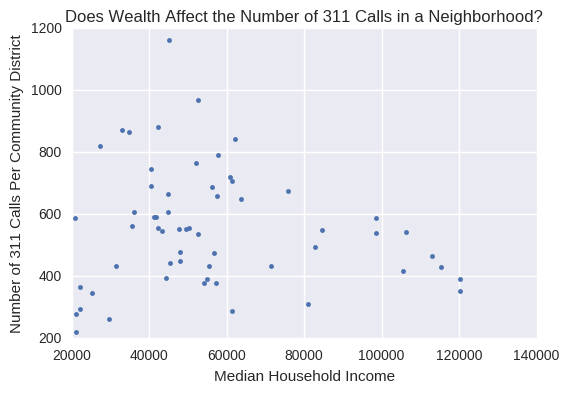

In [104]:
x = merge['median_house_income']
y = merge['num_complaints']
z = merge['Internet Access']

plt.plot(x, y, '.')
plt.xlabel('Median Household Income')
plt.ylabel('Number of 311 Calls Per Community District')
plt.title('Does Wealth Affect the Number of 311 Calls in a Neighborhood?')

looks like a modest positive relationship (with more time I'd show that with a statistical test)

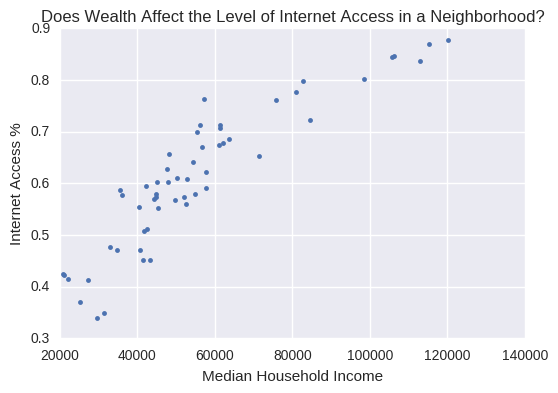

In [106]:
plt.plot(x, z, '.')
plt.xlabel('Median Household Income')
plt.ylabel('Internet Access %')
plt.title('Does Wealth Affect the Level of Internet Access in a Neighborhood?')

this shows an obvious, very strong relationship between income and internet access

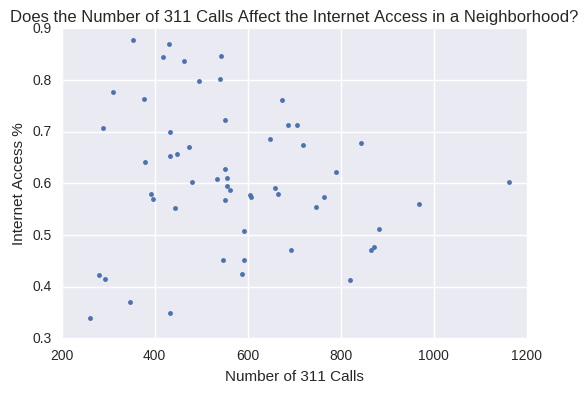

In [107]:
plt.plot(y, z, '.')
plt.xlabel('Number of 311 Calls')
plt.ylabel('Internet Access %')
plt.title('Does the Number of 311 Calls Affect the Internet Access in a Neighborhood?')

no relationship jumps out visually